In [1]:
data <- read.table("chr1.csv", col.names = c("bin_id","chr","start","end","input_label","cpg_number","class_label","methylation","read_number","cpg_pattern","A","B","A_norm",
                                           "B_norm","delta","A_sum","B_sum","p_val","p_adj"), sep = ",")


head(data,10)
# meth <- data$methylation
# read_number <- data$read_number

# methResult <- c()
# readResult <- c()

# for (i in 1: length(meth)){
#   if (!meth[i] %in% methResult) {
#     methResult <- append(methResult, meth[i])
#     readResult <- append(readResult, read_number[i])
#   } else {
#     readResult[match(meth[i], methResult)] = readResult[match(meth[i], methResult)] + read_number[i]
#   }
# }

bin_id,chr,start,end,input_label,cpg_number,class_label,methylation,read_number,cpg_pattern,A,B,A_norm,B_norm,delta,A_sum,B_sum,p_val,p_adj
chr1_3003900,chr1,3003800,3003900,AB,2,0,100.00000,606,1;1,239,367,85.663082,87.5894988,-1.9264164,279,419,0.8649280,0.8649280
chr1_3003900,chr1,3003800,3003900,AB,2,1,50.00000,35,0;1,17,18,6.093190,4.2959427,1.7972472,279,419,0.3777109,0.7150481
chr1_3003900,chr1,3003800,3003900,AB,2,2,50.00000,46,1;0,16,30,5.734767,7.1599045,-1.4251375,279,419,0.5362861,0.7150481
chr1_3003900,chr1,3003800,3003900,AB,2,3,0.00000,11,0;0,7,4,2.508961,0.9546539,1.5543066,279,419,0.1296598,0.5186390
chr1_3007600,chr1,3007500,3007600,AB,2,0,100.00000,236,1;1,113,123,75.838926,64.3979058,11.4410204,149,191,0.3501966,0.4647530
chr1_3007600,chr1,3007500,3007600,AB,2,1,50.00000,53,0;1,19,34,12.751678,17.8010471,-5.0493693,149,191,0.2990923,0.4647530
chr1_3007600,chr1,3007500,3007600,AB,2,2,0.00000,18,0;0,5,13,3.355705,6.8062827,-3.4505780,149,191,0.2256397,0.4647530
chr1_3007600,chr1,3007500,3007600,AB,2,3,50.00000,33,1;0,12,21,8.053691,10.9947644,-2.9410731,149,191,0.4647530,0.4647530
chr1_3014600,chr1,3014500,3014600,AB,3,0,66.66667,18,1;0;1,6,12,4.800000,6.7039106,-1.9039106,125,179,0.6251592,1.0000000
chr1_3014600,chr1,3014500,3014600,AB,3,1,66.66667,28,1;1;0,12,16,9.600000,8.9385475,0.6614525,125,179,0.8442316,1.0000000


In [2]:
#write.csv(data, "new_chr_19.csv")

In [3]:
# Per Bin
# Standard Settings
lowStandard <- 35.0
highStandard <- 70.0

In [4]:
binID <- data$bin_id
start <- data$start
meth <- data$methylation
aNorm <- data$A_norm
bNorm <- data$B_norm
aRead <- data$A
bRead <- data$B
cata <- rep(0, length(binID))

df <- data.frame(binID, start, meth, aRead, bRead, aNorm, bNorm, cata)

head(df)

f.cata <- function(row) {
#     print(row)
#     print(row[3])
      if (as.numeric(as.character(row[3])) < lowStandard) {
        row["cata"] <- 1
      } else if(as.numeric(as.character(row[3])) < highStandard){
        row["cata"] <- 2
      } else {
        row["cata"] <- 3
      }
      return(row)
}

df <- apply(df, MARGIN = 1, FUN = f.cata)
df <- t(df)
df <- as.data.frame(df)
head(df)

binID,start,meth,aRead,bRead,aNorm,bNorm,cata
chr1_3003900,3003800,100,239,367,85.663082,87.5894988,0
chr1_3003900,3003800,50,17,18,6.093190,4.2959427,0
chr1_3003900,3003800,50,16,30,5.734767,7.1599045,0
chr1_3003900,3003800,0,7,4,2.508961,0.9546539,0
chr1_3007600,3007500,100,113,123,75.838926,64.3979058,0
chr1_3007600,3007500,50,19,34,12.751678,17.8010471,0


binID,start,meth,aRead,bRead,aNorm,bNorm,cata
chr1_3003900,3003800,100.000000,239,367,85.6630824,87.5894988,3
chr1_3003900,3003800,50.000000,17,18,6.0931900,4.2959427,2
chr1_3003900,3003800,50.000000,16,30,5.7347670,7.1599045,2
chr1_3003900,3003800,0.000000,7,4,2.5089606,0.9546539,1
chr1_3007600,3007500,100.000000,113,123,75.8389262,64.3979058,3
chr1_3007600,3007500,50.000000,19,34,12.7516779,17.8010471,2


In [5]:
df$cata <- as.numeric(df$cata)
df <- df[order(df$start, -df$cata),]
df

,binID,start,meth,aRead,bRead,aNorm,bNorm,cata
1,chr1_3003900,3003800,100.000000,239,367,85.6630824,87.5894988,3
2,chr1_3003900,3003800,50.000000,17,18,6.0931900,4.2959427,2
3,chr1_3003900,3003800,50.000000,16,30,5.7347670,7.1599045,2
4,chr1_3003900,3003800,0.000000,7,4,2.5089606,0.9546539,1
5,chr1_3007600,3007500,100.000000,113,123,75.8389262,64.3979058,3
6,chr1_3007600,3007500,50.000000,19,34,12.7516779,17.8010471,2
8,chr1_3007600,3007500,50.000000,12,21,8.0536913,10.9947644,2
7,chr1_3007600,3007500,0.000000,5,13,3.3557047,6.8062827,1
11,chr1_3014600,3014500,100.000000,86,124,68.8000000,69.2737430,3
9,chr1_3014600,3014500,66.666667,6,12,4.8000000,6.7039106,2


In [6]:
df$aRead <- as.numeric(as.character(df[, "aRead"]))
df$bRead <- as.numeric(as.character(df[, "bRead"]))
df$aNorm <- as.numeric(as.character(df[, "aNorm"]))
df$bNorm <- as.numeric(as.character(df[, "bNorm"]))

In [7]:
head(df)

binID,start,meth,aRead,bRead,aNorm,bNorm,cata
chr1_3003900,3003800,100.000000,239,367,85.663082,87.5894988,3
chr1_3003900,3003800,50.000000,17,18,6.093190,4.2959427,2
chr1_3003900,3003800,50.000000,16,30,5.734767,7.1599045,2
chr1_3003900,3003800,0.000000,7,4,2.508961,0.9546539,1
chr1_3007600,3007500,100.000000,113,123,75.838926,64.3979058,3
chr1_3007600,3007500,50.000000,19,34,12.751678,17.8010471,2


In [8]:
testdf <- head(df, 100)
testdf

,binID,start,meth,aRead,bRead,aNorm,bNorm,cata
1,chr1_3003900,3003800,100.000000,239,367,85.663082,87.5894988,3
2,chr1_3003900,3003800,50.000000,17,18,6.093190,4.2959427,2
3,chr1_3003900,3003800,50.000000,16,30,5.734767,7.1599045,2
4,chr1_3003900,3003800,0.000000,7,4,2.508961,0.9546539,1
5,chr1_3007600,3007500,100.000000,113,123,75.838926,64.3979058,3
6,chr1_3007600,3007500,50.000000,19,34,12.751678,17.8010471,2
8,chr1_3007600,3007500,50.000000,12,21,8.053691,10.9947644,2
7,chr1_3007600,3007500,0.000000,5,13,3.355705,6.8062827,1
11,chr1_3014600,3014500,100.000000,86,124,68.800000,69.2737430,3
9,chr1_3014600,3014500,66.666667,6,12,4.800000,6.7039106,2


In [9]:
library(ggplot2)

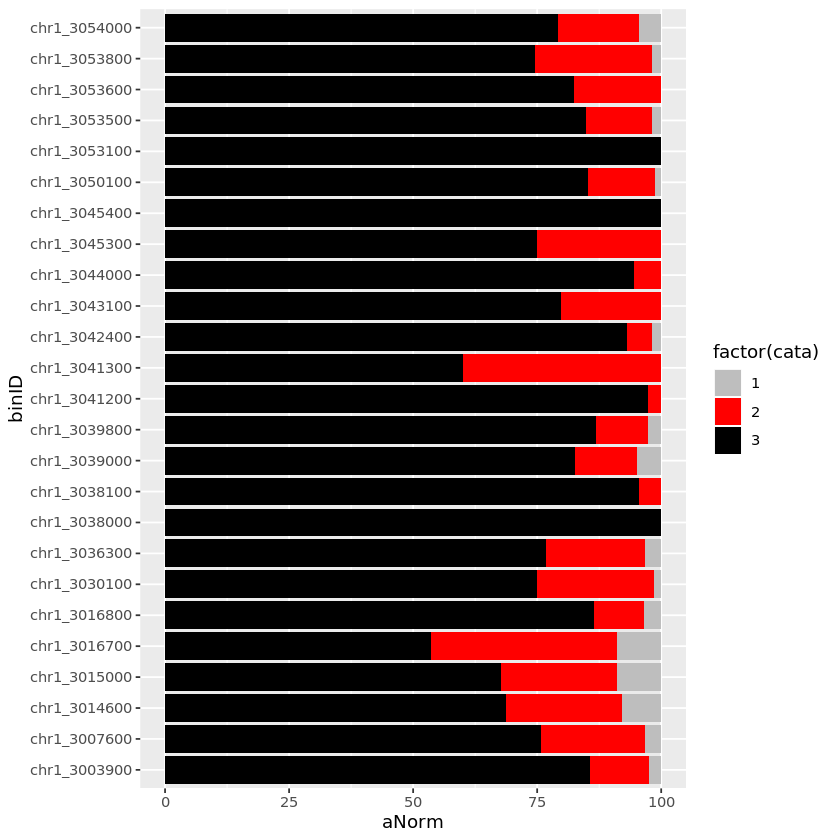

In [10]:
ggplot(data = testdf, aes(x = binID, y = aNorm, fill = factor(cata))) + 
  geom_bar(stat = "identity") + coord_flip() + scale_fill_manual(values = c("grey", "red", "black"))

Warning message:
“position_stack requires non-overlapping x intervals”

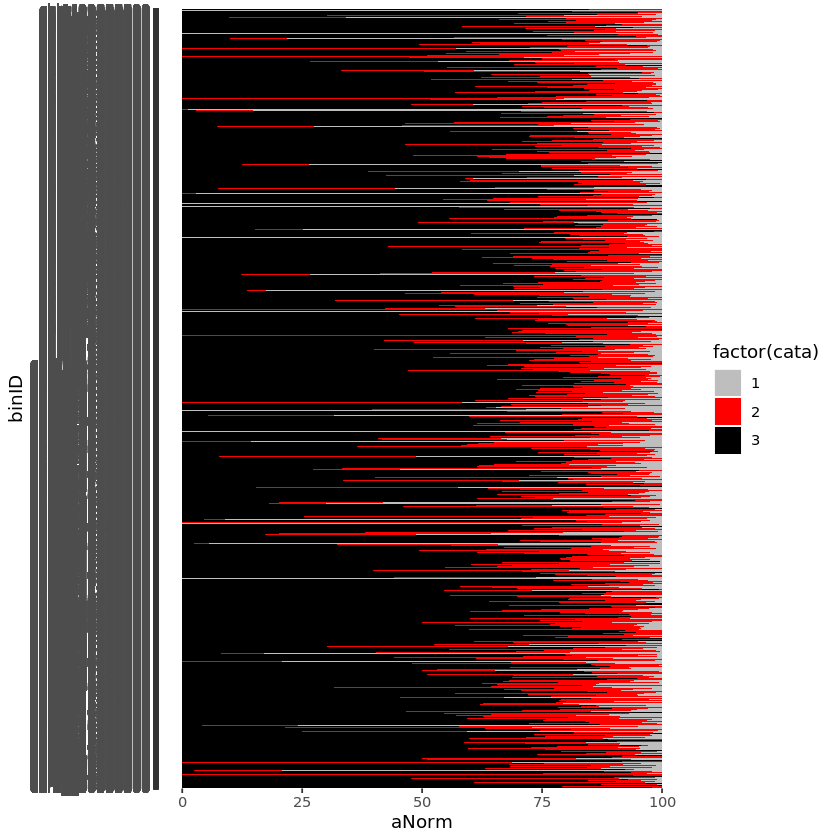

In [11]:
# A components
ggplot(data = df, aes(x = binID, y = aNorm, fill = factor(cata))) + 
  geom_bar(stat = "identity", width = 2) + coord_flip() + scale_fill_manual(values = c("grey", "red", "black"))

In [ ]:
# B components
ggplot(data = df, aes(x = binID, y = bNorm, fill = factor(cata))) + 
  geom_bar(stat = "identity", width = 2) + coord_flip() + scale_fill_manual(values = c("grey", "red", "black"))

Warning message:
“position_stack requires non-overlapping x intervals”

In [ ]:
deltaAB <- df$aNorm - df$bNorm
df <- cbind(df, deltaAB)


In [ ]:
df <- df[,-7]
df

In [ ]:
# Delta component


ggplot(data = df, aes(x = binID, y = deltaAB, fill = factor(cata))) + 
  geom_bar(stat = "identity", width = 2) + coord_flip() + scale_fill_manual(values = c("grey", "red", "black"))

In [ ]:
head(df)

In [ ]:
library(reshape2)

In [ ]:
# Stupid Version 1
# classifiedData <- data.frame()

# sumARead = as.numeric(as.character(df[1,]$aRead))
# sumBRead = as.numeric(as.character(df[1,]$bRead))
# sumANorm = as.numeric(as.character(df[1,]$aNorm))
# sumBNorm = as.numeric(as.character(df[1,]$bNorm))

# preRow = df[1,]

# cluster.fun <- function(row) {
#     if (row["binID"] == preRow["binID"] && row["cata"] == preRow["cata"]){
#         sumARead <<- sumARead + as.numeric(row["aRead"])
#         sumBRead <<- sumBRead + as.numeric(row["bRead"])
#         sumANorm <<- sumANorm + as.numeric(row["aNorm"])
#         sumBNorm <<- sumBNorm + as.numeric(row["bNorm"])
#     } else {
#         classifiedData <<- rbind(classifiedData, data.frame(binID = preRow["binID"], start = preRow["start"],
#                                                            meth = preRow["meth"], 
#                                                            aRead = sumARead, bRead = sumBRead,
#                                                            aNorm = sumANorm, bNorm = sumBNorm, 
#                                                            cata = preRow["cata"]))
#         sumARead <<- as.numeric(row["aRead"])
#         sumBRead <<- as.numeric(row["bRead"])
#         sumANorm <<- as.numeric(row["aNorm"])
#         sumBNorm <<- as.numeric(row["bNorm"])
#     }
#     preRow <<- row
# }

# invisible(apply(df[-1,], MARGIN = 1, FUN = cluster.fun))
# head(df,20)
# head(classifiedData,10)


# Stupid Version 2


# sumA = df[1,]$aNorm
# sumB = df[1,]$bNorm

# for (i in 2:nrow(df)) {
#     if (df[i,]$binID == df[i - 1,]$binID && df[i,]$cata == df[i - 1,]$cata){
#         sumA = sumA + df[i,]$aNorm
#         sumB = sumB + df[i,]$bNorm
#     } else {
#         classifiedData <- rbind(classifiedData, data.frame(binID = df[i - 1, 1], start = df[i - 1, 2], meth = df[i - 1, 3], aNorm = sumA, 
#                                                            bNorm = sumB, cata = df[i - 1, 6]))
#         sumA = df[i,]$aNorm
#         sumB = df[i,]$bNorm
#     }
# }


In [ ]:
classifiedData <- classifiedData[order(classifiedData$start, -classifiedData$cata),]

In [ ]:
head(df, 20)
head(classifiedData,10)

In [ ]:
# classifiedData$cata <- factor(classifiedData$cata, levels = c(3,2,1), labels = c("high", "medium", "low"))

In [ ]:
write.csv(classifiedData, "new_chr1_static_classified.csv")